Epoch 0, Loss: 0.250884
Epoch 1000, Loss: 0.244421
Epoch 2000, Loss: 0.004569
Epoch 3000, Loss: 0.001688
Epoch 4000, Loss: 0.001008
Epoch 5000, Loss: 0.000712
Epoch 6000, Loss: 0.000548
Epoch 7000, Loss: 0.000445
Epoch 8000, Loss: 0.000373
Epoch 9000, Loss: 0.000321

Final Results:
Input -> Target : Prediction
[0 0] -> 0 : 0.0139
[0 1] -> 1 : 0.9837
[1 0] -> 1 : 0.9822
[1 1] -> 0 : 0.0187


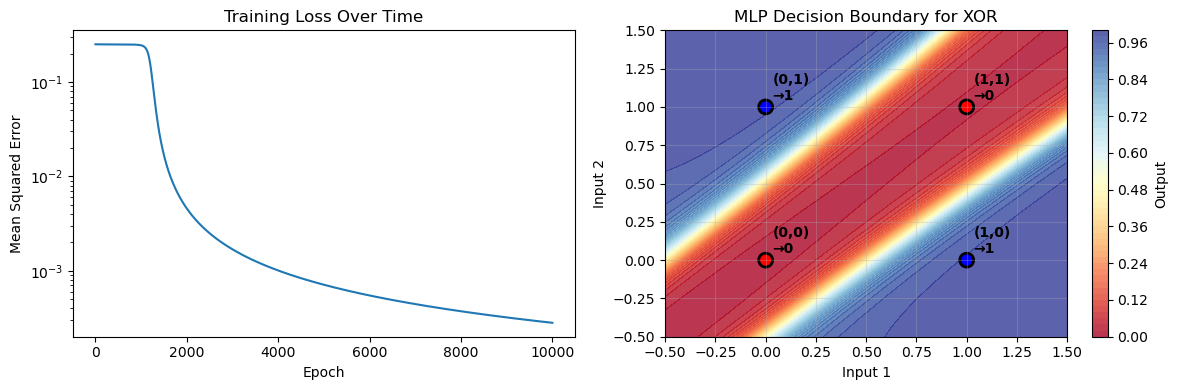


Testing with different logical operations:
Epoch 0, Loss: 0.421221
Epoch 1000, Loss: 0.005054
Epoch 2000, Loss: 0.001444
Epoch 3000, Loss: 0.000788
Epoch 4000, Loss: 0.000530

AND Gate Results:
[0 0] -> 0 : 0.0011
[0 1] -> 0 : 0.0205
[1 0] -> 0 : 0.0200
[1 1] -> 1 : 0.9725
Epoch 0, Loss: 0.251893
Epoch 1000, Loss: 0.003661
Epoch 2000, Loss: 0.001137
Epoch 3000, Loss: 0.000639
Epoch 4000, Loss: 0.000437

OR Gate Results:
[0 0] -> 0 : 0.0262
[0 1] -> 1 : 0.9817
[1 0] -> 1 : 0.9834
[1 1] -> 1 : 0.9962
Epoch 0, Loss: 0.264016
Epoch 1000, Loss: 0.003637
Epoch 2000, Loss: 0.001183
Epoch 3000, Loss: 0.000665
Epoch 4000, Loss: 0.000452

NAND Gate Results:
[0 0] -> 1 : 0.9998
[0 1] -> 1 : 0.9820
[1 0] -> 1 : 0.9824
[1 1] -> 0 : 0.0269


In [1]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-np.clip(x, -500, 500)))  # Clip to prevent overflow

def sigmoid_derivative(x):
    return x * (1 - x)

class MultiLayerPerceptron:
    def __init__(self, input_size, hidden_size, output_size, learning_rate=0.5):
        # Initialize weights with better random initialization
        self.W1 = np.random.randn(input_size, hidden_size) * 0.5
        self.b1 = np.zeros((1, hidden_size))
        self.W2 = np.random.randn(hidden_size, output_size) * 0.5
        self.b2 = np.zeros((1, output_size))
        self.learning_rate = learning_rate
    
    def forward(self, X):
        # Forward propagation
        self.z1 = np.dot(X, self.W1) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.a1, self.W2) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2
    
    def train(self, X, y, epochs=10000):
        losses = []
        
        for epoch in range(epochs):
            # Forward pass
            output = self.forward(X)
            
            # Calculate loss
            loss = np.mean((y.reshape(-1, 1) - output) ** 2)
            losses.append(loss)
            
            # Backward propagation
            # Output layer gradients
            output_error = y.reshape(-1, 1) - output
            output_delta = output_error * sigmoid_derivative(output)
            
            # Hidden layer gradients
            hidden_error = output_delta.dot(self.W2.T)
            hidden_delta = hidden_error * sigmoid_derivative(self.a1)
            
            # Update weights and biases
            self.W2 += self.a1.T.dot(output_delta) * self.learning_rate
            self.b2 += np.sum(output_delta, axis=0, keepdims=True) * self.learning_rate
            self.W1 += X.T.dot(hidden_delta) * self.learning_rate
            self.b1 += np.sum(hidden_delta, axis=0, keepdims=True) * self.learning_rate
            
            # Print progress
            if epoch % 1000 == 0:
                print(f"Epoch {epoch}, Loss: {loss:.6f}")
        
        return losses

# XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

# Create and train the network
mlp = MultiLayerPerceptron(input_size=2, hidden_size=4, output_size=1, learning_rate=0.5)
losses = mlp.train(X, y, epochs=10000)

# Test the network
predictions = mlp.forward(X)
print("\nFinal Results:")
print("Input -> Target : Prediction")
for i in range(len(X)):
    print(f"{X[i]} -> {y[i]} : {predictions[i][0]:.4f}")

# Plot training loss
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(losses)
plt.title('Training Loss Over Time')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.yscale('log')

# Plot decision boundary
def plot_decision_boundary(mlp, X, y):
    plt.subplot(1, 2, 2)
    x_min, x_max = -0.5, 1.5
    y_min, y_max = -0.5, 1.5
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = mlp.forward(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, levels=50, cmap=plt.cm.RdYlBu, alpha=0.8)
    plt.colorbar(label='Output')
    
    # Plot data points
    colors = ['red' if label == 0 else 'blue' for label in y]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=100, edgecolors='black', linewidth=2)
    
    # Add labels
    for i, (x_coord, y_coord) in enumerate(X):
        plt.annotate(f'({int(x_coord)},{int(y_coord)})\n→{y[i]}', 
                    (x_coord, y_coord), 
                    xytext=(5, 5), textcoords='offset points',
                    fontsize=10, fontweight='bold')
    
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.title('MLP Decision Boundary for XOR')
    plt.grid(True, alpha=0.3)

plot_decision_boundary(mlp, X, y)
plt.tight_layout()
plt.show()

# Test with different datasets
print("\n" + "="*50)
print("Testing with different logical operations:")

# AND gate
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

mlp_and = MultiLayerPerceptron(input_size=2, hidden_size=3, output_size=1, learning_rate=0.3)
mlp_and.train(X_and, y_and, epochs=5000)
pred_and = mlp_and.forward(X_and)

print("\nAND Gate Results:")
for i in range(len(X_and)):
    print(f"{X_and[i]} -> {y_and[i]} : {pred_and[i][0]:.4f}")

# OR gate
y_or = np.array([0, 1, 1, 1])
mlp_or = MultiLayerPerceptron(input_size=2, hidden_size=3, output_size=1, learning_rate=0.3)
mlp_or.train(X_and, y_or, epochs=5000)
pred_or = mlp_or.forward(X_and)

print("\nOR Gate Results:")
for i in range(len(X_and)):
    print(f"{X_and[i]} -> {y_or[i]} : {pred_or[i][0]:.4f}")

# NAND gate
y_nand = np.array([1, 1, 1, 0])
mlp_nand = MultiLayerPerceptron(input_size=2, hidden_size=3, output_size=1, learning_rate=0.3)
mlp_nand.train(X_and, y_nand, epochs=5000)
pred_nand = mlp_nand.forward(X_and)

print("\nNAND Gate Results:")
for i in range(len(X_and)):
    print(f"{X_and[i]} -> {y_nand[i]} : {pred_nand[i][0]:.4f}")